# 1. Обработка пропусков в данных

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max.rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style='ticks')

In [4]:
data = pd.read_csv('data/fifa18-all-player-statistics-2019.csv')
data.shape

(18207, 89)

In [5]:
data.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [6]:
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

### Обработка датасета

In [7]:
# Удалим колонку с большим кол-вом пропусков (> 70%)
data = data.drop(columns='Loaned From')

In [8]:
# Числовые колонки с нулевыми значениями
cols_with_null_values = []
for col in data.columns:
    null_count = data[col].isnull().sum()
    if data[col].dtype in ('float64', 'int64') and null_count != 0:
        cols_with_null_values.append(col)
        
print('Числовые (int64, float64) колонки с нулевыми значениями:', cols_with_null_values)

Числовые (int64, float64) колонки с нулевыми значениями: ['International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [10]:
# Заполним пустые значения в числовых колонках
# используем медианную стратегию
for col in cols_with_null_values:
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(data[[col]])
    imp_num = SimpleImputer(strategy='median')
    data[[col]] = imp_num.fit_transform(data[[col]])

In [11]:
data.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                     48
Body Type                     48
Real Face                     48
Position                      60
Jersey Number                  0
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW        

In [12]:
# Заполним пустые значения в категориальных данных
cat_cols_with_null_values = []
for col in data.columns:
    null_count = data[col].isnull().sum()
    if data[col].dtype not in ('float64', 'int64') and null_count != 0: # object
        cat_cols_with_null_values.append(col)
        
print('Категориальные not(int64, float64) колонки с нулевыми значениями:', cat_cols_with_null_values)

Категориальные not(int64, float64) колонки с нулевыми значениями: ['Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']


In [13]:
# Заполним пустые значения в категориальных колонках
# используем most_frequent (мода) стратегию
for col in cat_cols_with_null_values:
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(data[[col]])
    imp_num = SimpleImputer(strategy='most_frequent')
    data[[col]] = imp_num.fit_transform(data[[col]])

In [14]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF        

# 2. Преобразование категориальных признаков в числовые

In [15]:
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col)
# колонки Photo, Flag, Club Logo не представляют ценности
cat_cols.remove('Photo')
cat_cols.remove('Flag')
cat_cols.remove('Club Logo')
for col in cat_cols:
    print(col, data[col].unique())

Name ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Nationality ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic of Ireland'
 'Romania' 'United States' 'Cape Verde' 'Australia' 'Peru' 'Togo' 'Syria'
 'Zimbabwe' 'Angola' 'Burkina Faso' 'Iran' 'Estonia' 'Tunisia'
 'Equatorial Guinea' 'New Zealand' 'FYR Macedonia' 'United Arab Emi

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoding_of_cat = {}
for col in cat_cols:
    le = LabelEncoder()
    data[[col]] = le.fit_transform(data[col])
    print(col, data[col].unique())
    encoding_of_cat[col] = le

Name [ 9632  3153 12508 ...  2133  3997  5807]
Nationality [  6 123  20 139  13  35 158 136 122  59  55  46  78  44  31  41  56 161
 132  34 135 108  18 105 133   2   9  61  29 144  86  54  65 103   7 145
 115  39 131  60  27  40  79 128 155  72 101  80   1 160  81 153  43 119
  97 113  24  42  77  84  71 126 127 157  26   8 120 150 146 163   4  22
  75  49 152  47 110  51 156  30  66  21  87 137  96  58 148  57  36  12
 159  15  33 106  69  25 114  38 130  37 102  17 151 134 162  28 121  68
  32  92 118 147  48 116  76  23  53 109  94  95  85  93 140  89 143 154
  45  16  88   5 149 100  64  91  83 112  99 104 107  10  63  52  73 111
  11  90 117  67 142 141  50 124  62  82 129 125   0  70   3  98  14 138
  74  19]
Club [212 326 435 375 374 134 470  61 214 583 363 398  52 382 315 351  86 620
 418 482 605 280 232 234  77 346 552 469 419 457  72 473 619 530 504  19
  17 358  55 278  62 456  26 176 206 633   3 574 535 412  36 640  87 297
 511 168  56 581 377  74 169 427 616 531 582 367 5

LAM [100  98  99  46  97  95  67  91  93  49  83  90  96  86  94  33  73  88
  65  63  77  29  81  59  89  92  53  69  61  39  79  40  25  85  57  75
  55  43  84  26  50  28  51  71  47  87  82  37  42  70  52  38  74  32
  56  44  68  78  21  54  60  48  64  36  80  72  76  41  30  45  62  34
  66  27  58  35  23  22  19  16  24  14  20  18  17  11  13  15  31  10
  12   8   9   7   6   2   5   4   3   1   0]
CAM [100  98  99  46  97  95  67  91  93  49  83  90  96  86  94  33  73  88
  65  63  77  29  81  59  89  92  53  69  61  39  79  40  25  85  57  75
  55  43  84  26  50  28  51  71  47  87  82  37  42  70  52  38  74  32
  56  44  68  78  21  54  60  48  64  36  80  72  76  41  30  45  62  34
  66  27  58  35  23  22  19  16  24  14  20  18  17  11  13  15  31  10
  12   8   9   7   6   2   5   4   3   1   0]
RAM [100  98  99  46  97  95  67  91  93  49  83  90  96  86  94  33  73  88
  65  63  77  29  81  59  89  92  53  69  61  39  79  40  25  85  57  75
  55  43  84  26  50

In [18]:
data.dtypes

Unnamed: 0                    int64
ID                            int64
Name                          int64
Age                           int64
Photo                        object
Nationality                   int64
Flag                         object
Overall                       int64
Potential                     int64
Club                          int64
Club Logo                    object
Value                         int64
Wage                          int64
Special                       int64
Preferred Foot                int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                     int64
Body Type                     int64
Real Face                     int64
Position                      int64
Jersey Number               float64
Joined                        int64
Contract Valid Until          int64
Height                        int64
Weight                        int64
LS                          

In [19]:
encoding_of_cat
# можем выполнить декодирование

{'Name': LabelEncoder(),
 'Nationality': LabelEncoder(),
 'Club': LabelEncoder(),
 'Value': LabelEncoder(),
 'Wage': LabelEncoder(),
 'Preferred Foot': LabelEncoder(),
 'Work Rate': LabelEncoder(),
 'Body Type': LabelEncoder(),
 'Real Face': LabelEncoder(),
 'Position': LabelEncoder(),
 'Joined': LabelEncoder(),
 'Contract Valid Until': LabelEncoder(),
 'Height': LabelEncoder(),
 'Weight': LabelEncoder(),
 'LS': LabelEncoder(),
 'ST': LabelEncoder(),
 'RS': LabelEncoder(),
 'LW': LabelEncoder(),
 'LF': LabelEncoder(),
 'CF': LabelEncoder(),
 'RF': LabelEncoder(),
 'RW': LabelEncoder(),
 'LAM': LabelEncoder(),
 'CAM': LabelEncoder(),
 'RAM': LabelEncoder(),
 'LM': LabelEncoder(),
 'LCM': LabelEncoder(),
 'CM': LabelEncoder(),
 'RCM': LabelEncoder(),
 'RM': LabelEncoder(),
 'LWB': LabelEncoder(),
 'LDM': LabelEncoder(),
 'CDM': LabelEncoder(),
 'RDM': LabelEncoder(),
 'RWB': LabelEncoder(),
 'LB': LabelEncoder(),
 'LCB': LabelEncoder(),
 'CB': LabelEncoder(),
 'RCB': LabelEncoder(),
 'RB

In [20]:
encoding_of_cat['Preferred Foot'].inverse_transform([0, 1])

array(['Left', 'Right'], dtype=object)

In [21]:
enc_value = encoding_of_cat['Name'].transform(['L. Messi'])[0]
l_messi_data = data[data['Name'] == enc_value]
l_messi_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,9632,31,https://cdn.sofifa.org/players/4/19/158023.png,6,https://cdn.sofifa.org/flags/52.png,94,94,212,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,293


In [22]:
encoding_of_cat['Nationality'].inverse_transform([l_messi_data['Nationality'][0]])

array(['Argentina'], dtype=object)

In [23]:
encoding_of_cat['Club'].inverse_transform([l_messi_data['Club'][0]])

array(['FC Barcelona'], dtype=object)

In [24]:
encoding_of_cat['Preferred Foot'].inverse_transform([l_messi_data['Preferred Foot'][0]])

array(['Left'], dtype=object)

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [26]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Weight']])

/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


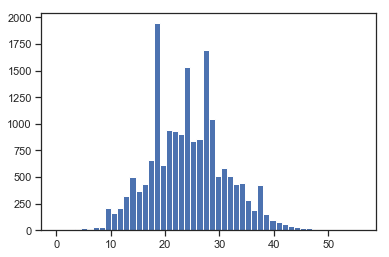

In [28]:
plt.hist(data['Weight'], 50)
plt.show()

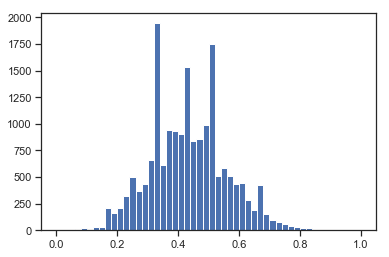

In [29]:
plt.hist(sc1_data, 50)
plt.show()

In [31]:
# на основе z-оценки
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Weight']])

/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


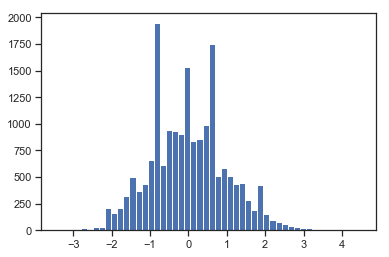

In [32]:
plt.hist(sc2_data, 50)
plt.show()

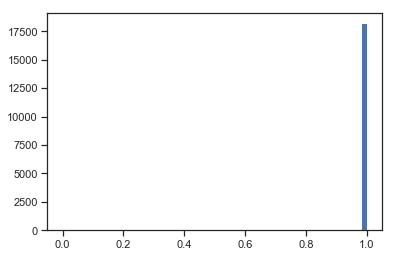

In [49]:
# нормализация
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Weight']])
plt.hist(sc3_data, 50)
plt.show()